In [1]:
# Loading the libraries:
import pandas as pd
import numpy as np

In [2]:
# Loading the data:
titanic = pd.read_csv('https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv')

In [3]:
# Let's examine the dataset:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Exploratory Data Analysis(EDA):
print('Total number of passangers in the training data...', len(titanic))
print('Number of passangers in the training data who survived...', len(titanic[titanic['Survived']==1]))

Total number of passangers in the training data... 891
Number of passangers in the training data who survived... 342


In [5]:
print('% of men who survived', 100*np.mean(titanic['Survived'][titanic['Sex'] == 'male']))
print('% of women who survived', 100*np.mean(titanic['Survived'][titanic['Sex']=='female']))

% of men who survived 18.890814558058924
% of women who survived 74.20382165605095


In [7]:
print('% of passangers who survived in first class', 100*np.mean(titanic['Survived'][titanic['Pclass'] == 1]))
print('% of passangers who survived in third class', 100*np.mean(titanic['Survived'][titanic['Pclass'] == 3]))

% of passangers who survived in first class 62.96296296296296
% of passangers who survived in third class 24.236252545824847


In [8]:
print('% of children who survived', 100*np.mean(titanic['Survived'][titanic['Age'] < 18]))
print('% of adults who survived', 100*np.mean(titanic['Survived'][titanic['Age'] > 18]))

% of children who survived 53.98230088495575
% of adults who survived 38.26086956521739


In [9]:
# Data Pre-Processing:
# We are going to use a decision tree model. The model requires only numeric values, but one of our features is categorical: "female" or "male".
# This can easily be fixed by encoding this feature: "male" = 1, "female" = 0

In [10]:
titanic['Sex'] = titanic['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [11]:
# Handling Missing Values:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
titanic['Age'] = titanic['Age'].fillna(np.mean(titanic['Age']))

In [13]:
# Looking at frequency of each values in 'Embarked'
titanic.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [14]:
# Note: Filling missing values of a categorical variable with mode.
# But I can also use the bellow code to filling missing values (This is not an ideal method)
titanic.Embarked.fillna(value='S', axis = 0, inplace=True)  # Rowwise input

C:\Users\sadda\AppData\Local\Temp\ipykernel_7468\837722657.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic.Embarked.fillna(value='S', axis = 0, inplace=True)  # Rowwise input


In [15]:
# Now check the missing values again:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
# Delete the irrelevant columns:
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [17]:
# Separate the input variables (X) and target variable(y)
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [18]:
# Train And Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
# Building ML Model:
#Now we are finally ready, and we can train the model.

#First, we need to import our model - A decision tree classifier (again, using the sklearn library).

#Then we would feed the model both with the data (X_train) and the answers for that data (y_train)

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
# Evaluate the model:
#Now we have a model. Let's evaulate it with using the accuracy_score function. 
#This output of the function is the number of right answers (passengers survival/death was predicted correctly) divided by the total number of passengers

In [22]:
from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(y_train, model.predict(X_train)))
print('Test accuracy...', accuracy_score(y_test, model.predict(X_test)))

Training accuracy... 0.9798657718120806
Test accuracy... 0.752542372881356


In [23]:
#The accuracy function compares between the actual results (our ground truth - y_train or y_test) with the prediction of 
#the model (given by "classifier.predict(X_train)" or "classifier.predict(X_test)" respectrively.

#The large difference between the training score and the validation score suggets that our model overfits. 
#That is, instead of leraning general rules that can be applied on unseen data, it does something that is more similar to memorize the training data. 
#So our model performs really well on the training data (98% accuracy) but not remotely as well on the validation data.

In [24]:
from sklearn.tree import export_graphviz
import graphviz

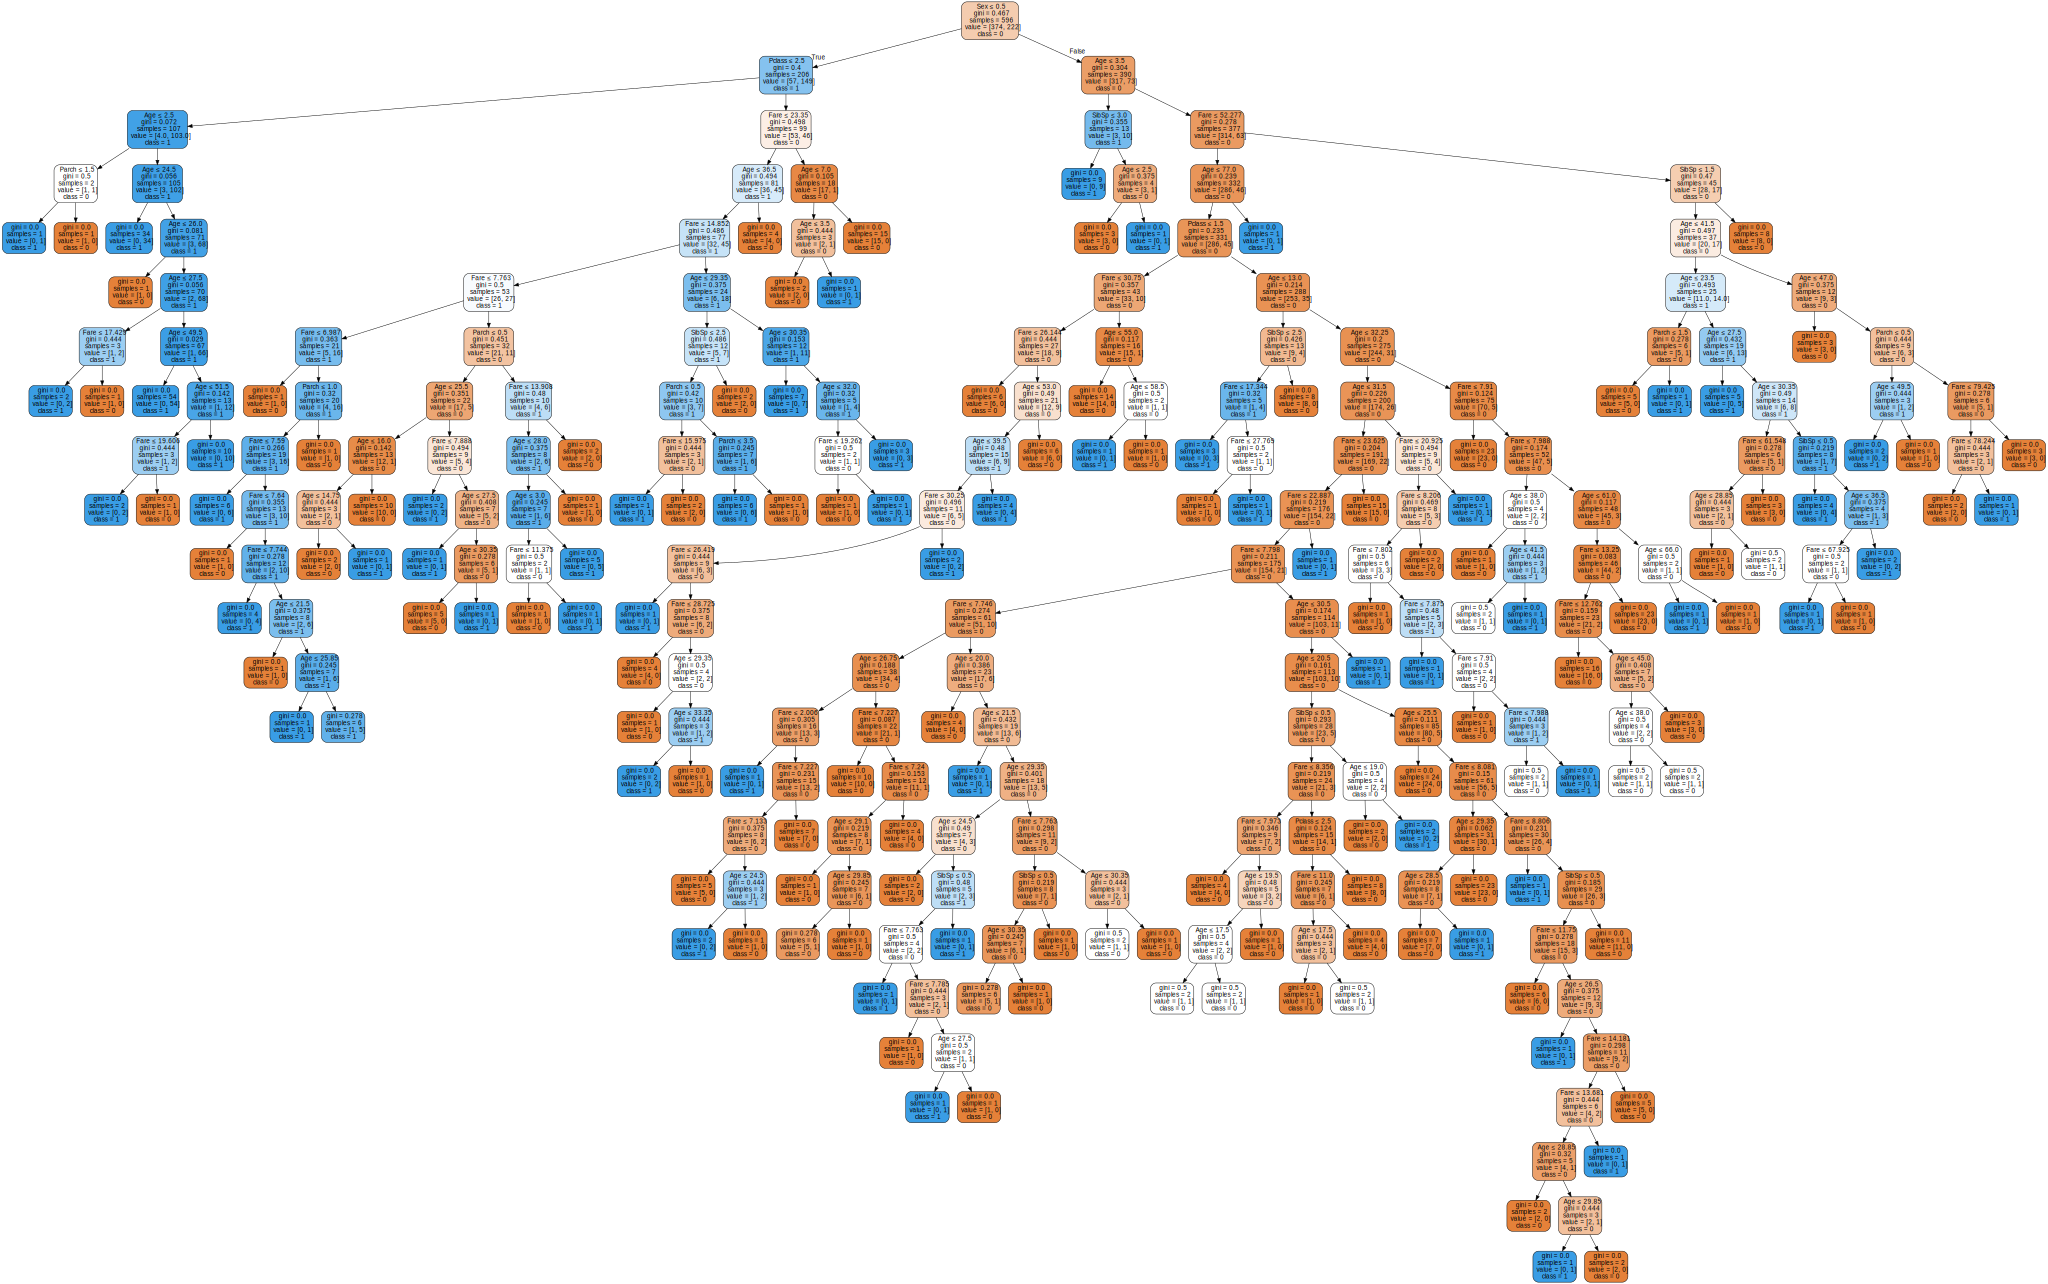

In [25]:
dot_data = export_graphviz(model, out_file=None,
                          feature_names=X_test.columns,
                          class_names=['0', '1'],
                          filled = True, rounded = True,
                          special_characters=True)
graph1 = graphviz.Source(dot_data)
graph1

In [26]:
#This is a very complex model, and if you zoom in you would see that in many leaves we have only 1 sample. 
#This means that the model learned many complex rules to memorize the survival or death of each passenger in the training data.

In [27]:
# Improve The Model:
# We can reduce overfitting by limiting the number of "questions" that the model is allowed to ask.
# So, Let us again create an instance of a decision tree, but this one cannot produce trees deeper than 3 (3 questions):

In [28]:
model_improved = DecisionTreeClassifier(max_depth=3)
model_improved.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [29]:
print('train score...', accuracy_score(y_train, model_improved.predict(X_train)))
print('test score...', accuracy_score(y_test, model_improved.predict(X_test)))

train score... 0.8238255033557047
test score... 0.8203389830508474


In [30]:
#We can see that while the train score went down, the test score has improved and it is now almost as high as the train score. 
#This means that the model does not overfit as badly anymore. 82% accuracy with such a simple model is quite impressive

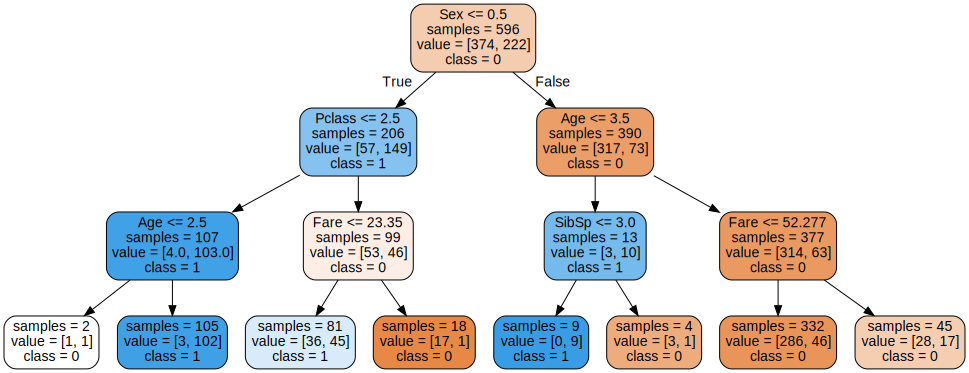

In [31]:
# Let's visualize the tree again:
dot_data = export_graphviz(model_improved, out_file=None, impurity=False,
                          feature_names = X_test.columns,
                          class_names=['0', '1'],
                          filled=True, rounded=True)
graph2 = graphviz.Source(dot_data)
graph2

In [32]:
# Conclusion:
# The training is the process of finding the most important features, and then use them to split the data. 
# The training algorithm found that the most important features is the Sex. secondly, the class for females, and age for males. 
 #The bluer the block is, the higher the survival rate is, and opoositely with browner blocker.